In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import calendar


In [2]:
# data file to load and read
file = "Data Output/Toronto_Crimes_Occurred_2014_2019.csv"
crime_data = pd.read_csv(file)
crime_data.head(2)

,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
0,0,GO-20141756319,Commercial,1430.0,100.0,Assault,2014.0,March,24.0,83.0,...,24.0,83.0,Monday,1.0,Assault,D42,132,Malvern (132),-79.199081,43.800281
1,1,GO-20143006885,Other,2120.0,200.0,B&E,2014.0,September,29.0,272.0,...,27.0,270.0,Saturday,16.0,Break and Enter,D52,76,Bay Street Corridor (76),-79.386383,43.662472


In [3]:
crime_data["Count"]= 1

In [5]:
#converting datatype of "occurrenceyear" to integer
crime_data=crime_data.astype({"occurrenceyear":int})

In [6]:
crime_data_Grp_year=crime_data.groupby('occurrenceyear').count()
crime_data_Grp_year

,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,Count
occurrenceyear,,,,,,,,,,,,,,,,,,,,,
2014,34710,34710,34652,31638,31638,34710,31638,31638,31638,31638,...,31638,31638,34652,34710,34710,34710,34710,34710,34710,34710
2015,35660,35660,35601,32316,32316,35660,32316,32316,32316,32316,...,32316,32316,35601,35660,35660,35660,35660,35660,35660,35660
2016,36684,36684,36609,32809,32809,36684,32809,32809,32809,32809,...,32809,32809,36609,36684,36684,36684,36684,36684,36684,36684
2017,38489,38489,38424,34561,34561,38489,34561,34561,34561,34561,...,34561,34561,38424,38489,38489,38489,38489,38489,38489,38489
2018,40368,40368,40272,36323,36323,40368,36323,36323,36323,36323,...,36323,36323,40272,40368,40368,40368,40368,40368,40368,40368
2019,41425,41425,41347,37674,37674,41425,37674,37674,37674,37674,...,37674,37674,41347,41425,41425,41425,41425,41425,41425,41425


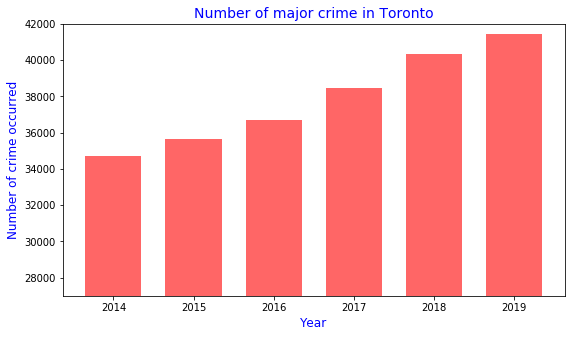

In [7]:
x_axis = crime_data["occurrenceyear"].unique()
y_value= crime_data_Grp_year['Count']

plt.figure(figsize=(11,6))
plt.bar(x_axis,y_value, width =0.7,color ='red',alpha=0.6)

plt.title("Number of major crime in Toronto",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.ylim(27000, 42000)

plt.savefig("Data Output/major_crime_year.png")
plt.show()

From 2014 to 2019, number of crime increased by 19.35%.

Crime growth rate in 2019 is 2.62%.

Crime growth rate in 2018 is 4.88%.

Crime growth rate in 2017 is 4.92%.

Crime growth rate in 2016 is 2.87%.

Crime growth rate in 2015 is 2.74%.



In [8]:
# average growth rate for the last 6 year
year_count = crime_data["occurrenceyear"].value_counts()
year_count_df = pd.DataFrame(year_count)
year_count_df

y2019=year_count_df.iloc[0]["occurrenceyear"]
y2018=year_count_df.iloc[1]["occurrenceyear"]
y2017=year_count_df.iloc[2]["occurrenceyear"]
y2016=year_count_df.iloc[3]["occurrenceyear"]
y2015=year_count_df.iloc[4]["occurrenceyear"]
y2014=year_count_df.iloc[5]["occurrenceyear"]

g2019=round(((y2019/y2018)-1)*100,2)
print(f"Crime growth rate in 2019 is {g2019}%.")
g2018=round(((y2018/y2017)-1)*100,2)
print(f"Crime growth rate in 2018 is {g2018}%.")
g2017=round(((y2017/y2016)-1)*100,2)
print(f"Crime growth rate in 2017 is {g2017}%.")
g2016=round(((y2016/y2015)-1)*100,2)
print(f"Crime growth rate in 2016 is {g2016}%.")
g2015=round(((y2015/y2014)-1)*100,2)
print(f"Crime growth rate in 2015 is {g2015}%.")
g2019_5yr = round(((y2019/y2014)-1)*100,2)
print(f"Over the last 6 years, number of crime increased by {g2019_5yr}% (2014 ~ 2019).")

Crime growth rate in 2019 is 2.62%.
Crime growth rate in 2018 is 4.88%.
Crime growth rate in 2017 is 4.92%.
Crime growth rate in 2016 is 2.87%.
Crime growth rate in 2015 is 2.74%.
Over the last 6 years, number of crime increased by 19.35% (2014 ~ 2019).


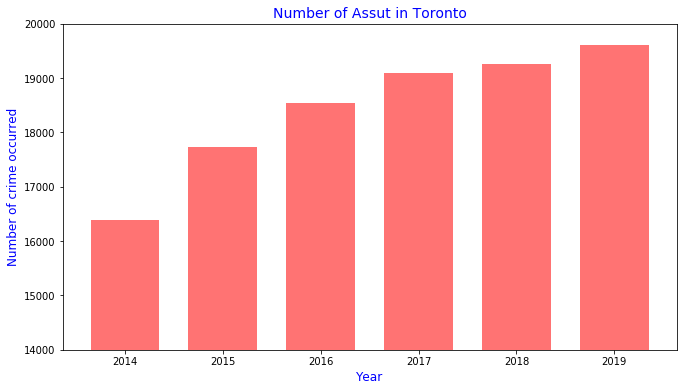

In [45]:
# Major crime type, Assult in Toronto over the last 6 years

crime_data_assult=crime_data.loc[(crime_data['MCI']=="Assault")]
crime_data_assult_year=crime_data_assult.groupby('occurrenceyear').sum()

x_axis = crime_data_assult["occurrenceyear"].unique()
y_value= crime_data_assult_year['Count']

plt.figure(figsize=(11,6))
plt.bar(x_axis,y_value, width =0.7, color ='red',alpha=0.55)

plt.title("Number of Assut in Toronto",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.ylim(14000, 20000)

plt.savefig("Data Output/Assut_year.png")
plt.show()

From 2014 to 2019, number of Assult increased by 19.55%.

In [13]:
# growth rate from 2014 to 2019
assult2014 = crime_data_assult_year.iloc[0]["Count"]
assult2019 = crime_data_assult_year.iloc[5]["Count"]
assult2019_5yr = round(((assult2019/assult2014)-1)*100,2)
assult2019_5yr
print(f"From 2014 to 2019, number of Assult increased by {assult2019_5yr}%.")

From 2014 to 2019, number of Assult increased by 19.55%.


In [14]:
# growth rate for each crime type

crime_data_BnE=crime_data.loc[(crime_data['MCI']=="Break and Enter")]
crime_data_BnE_year=crime_data_BnE.groupby('occurrenceyear').sum()
BnE2014=crime_data_BnE_year.iloc[0]["Count"]
BnE2019=crime_data_BnE_year.iloc[5]["Count"]
# 5 yr growth rate for BnE
BnE2019_5yr = round(((BnE2019/BnE2014)-1)*100,2)


crime_data_auto=crime_data.loc[(crime_data['MCI']=="Auto Theft")]
crime_data_auto_year=crime_data_auto.groupby('occurrenceyear').sum()
auto2014=crime_data_auto_year.iloc[0]["Count"]
auto2019=crime_data_auto_year.iloc[5]["Count"]
# 5 yr growth rate for auto theft
auto2019_5yr = round(((auto2019/auto2014)-1)*100,2)


crime_data_robb=crime_data.loc[(crime_data['MCI']=="Robbery")]
crime_data_robb_year=crime_data_robb.groupby('occurrenceyear').sum()
robbery2014=crime_data_robb_year.iloc[0]["Count"]
robbery2019=crime_data_robb_year.iloc[5]["Count"]
# 5 yr growth rate for robbery
robbery2019_5yr = round(((robbery2019/robbery2014)-1)*100,2)

In [15]:
print(f"From 2014 to 2019,\nBreak'n Enter increased by {BnE2019_5yr}%,\nAuto Theft increased by {auto2019_5yr}%,\nRobbery decreased by {robbery2019_5yr}%.")

From 2014 to 2019,
Break'n Enter increased by 15.32%,
Auto Theft increased by 47.4%,
Robbery decreased by -4.96%.


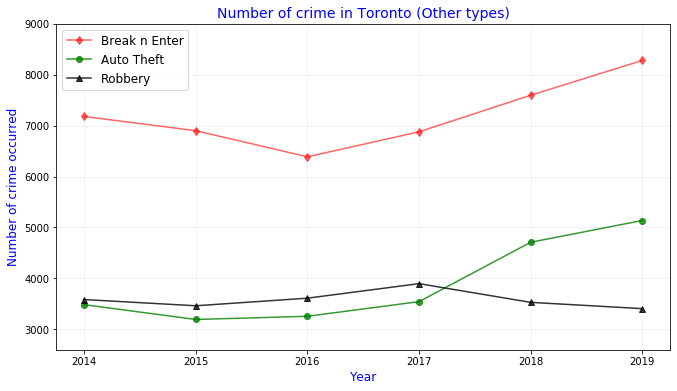

In [44]:
x_axis = crime_data_assult["occurrenceyear"].unique()

plt.figure(figsize=(11,6))

y_value= crime_data_BnE_year['Count']
BnE, =plt.plot(x_axis,y_value,color ='red',alpha=0.6, marker="d",label="Break n Enter")

y_value= crime_data_auto_year['Count']
auto, =plt.plot(x_axis,y_value,color ='green',alpha=0.8, marker="o",label="Auto Theft")

y_value= crime_data_robb_year['Count']
robb, =plt.plot(x_axis,y_value,color ='black',alpha=0.8, marker="^",label="Robbery")

plt.title("Number of crime in Toronto (Other types)",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.grid(alpha=0.2)
plt.ylim(2600, 9000)
plt.legend(handles=[BnE,auto, robb], loc="best",fontsize =12 )

plt.savefig("Data Output/Others_year.png")
plt.show()

Interesting observation: Robbery is downward since the peak in 2017.

From 2014 to 2019, Robbery decreased by -4.96%, while Break'n Enter and Auto Theft increased by 15.32%, 47.4% respectively.

In [17]:
# Seasonality of crime of 
# 0. overall
# 1. assult
# 2. Break and Enter
# 3. Auto Theft

In [18]:
# step 1. get the average of each momth over the last 6 years.
# i.e) average of number of crime occurred in January over the last 6 years.  Feb ~ Dec 
crime_data_Grp_month=crime_data.groupby('occurrencemonth').count()/6

In [19]:
# sort by Calendar month in groupby object
cats=['January','February','March','April', 'May','June','July','August', 'September','October','November', 'December']
crime_data_Grp_month.index = pd.CategoricalIndex(crime_data_Grp_month.index, categories=cats,ordered=True)
crime_data_Grp_month = crime_data_Grp_month.sort_index()

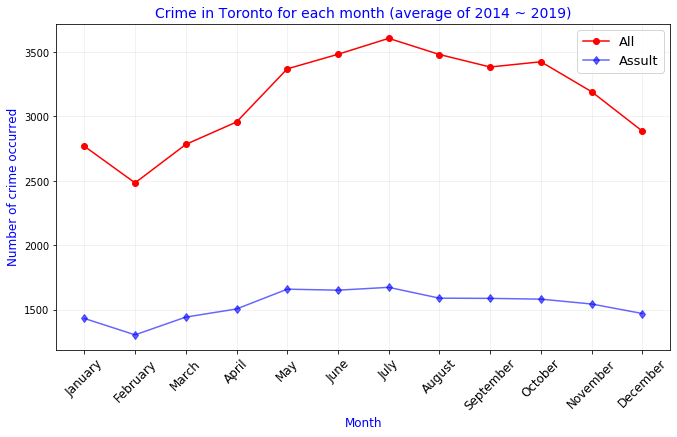

In [43]:
x_axis = ['January','February','March','April', 'May', 'June','July', 'August', 'September',
          'October',  'November', 'December']

plt.figure(figsize=(11,6))

y_value= crime_data_Grp_month['Count']
all_crime, = plt.plot(x_axis, y_value, color ='red', marker = "o", label="All")


y_value= crime_data_assult_month['Count']
assult, =plt.plot(x_axis,y_value,color ='blue',alpha=0.6, marker="d",label="Assult")

plt.title("Crime in Toronto for each month (average of 2014 ~ 2019)",fontsize =14, color ='blue')
plt.xlabel('Month',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.grid(alpha=0.2)
plt.xticks(rotation=45,fontsize =12)
#plt.ylim(2400, 3700)
plt.legend(handles=[all_crime, assult], loc="best",fontsize =13 )

plt.savefig("Data Output/Crime_month.png")
plt.show()

Based on the 6-year average, the number of overall crime peaks in the month of July (3606 cases) while the month of February is lowest (2,484 cases). Assult crime follows the same pattern. The peak in summer season (Jun, Jul, Aug) and troug in winter season (Dec, Jan , Feb)

In [35]:
# get the average of each month over the past 6 years by crime type



#sort by calendar month
cats=['January','February','March','April', 'May','June','July','August', 'September','October','November', 'December']
crime_data_assult_month=crime_data_assult.groupby('occurrencemonth').count()/6
crime_data_assult_month.index = pd.CategoricalIndex(crime_data_assult_month.index, categories=cats,ordered=True)
crime_data_assult_month = crime_data_assult_month.sort_index()


crime_data_BnE_month=crime_data_BnE.groupby('occurrencemonth').count()/6
#sort by calendar month
cats=['January','February','March','April', 'May','June','July','August', 'September','October','November', 'December']
crime_data_BnE_month.index = pd.CategoricalIndex(crime_data_BnE_month.index, categories=cats,ordered=True)
crime_data_BnE_month = crime_data_BnE_month.sort_index()

crime_data_auto_month=crime_data_auto.groupby('occurrencemonth').count()/6
#sort by calendar month
cats=['January','February','March','April', 'May','June','July','August', 'September','October','November', 'December']
crime_data_auto_month.index = pd.CategoricalIndex(crime_data_auto_month.index, categories=cats,ordered=True)
crime_data_auto_month = crime_data_auto_month.sort_index()

crime_data_robb_month=crime_data_robb.groupby('occurrencemonth').count()/6
#sort by calendar month
cats=['January','February','March','April', 'May','June','July','August', 'September','October','November', 'December']
crime_data_robb_month.index = pd.CategoricalIndex(crime_data_robb_month.index, categories=cats,ordered=True)
crime_data_robb_month = crime_data_robb_month.sort_index()

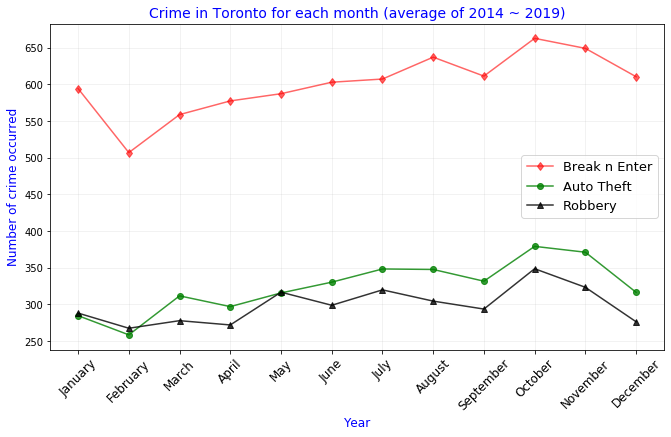

In [42]:
plt.figure(figsize=(11,6))

x_axis = ['January','February','March','April', 'May', 'June','July', 'August', 'September',
          'October',  'November', 'December']

y_value= crime_data_BnE_month['Count']
BnE, =plt.plot(x_axis,y_value,color ='red',alpha=0.6, marker="d",label="Break n Enter")

y_value= crime_data_auto_month['Count']
auto, =plt.plot(x_axis,y_value,color ='green',alpha=0.8, marker="o",label="Auto Theft")

y_value= crime_data_robb_month['Count']
robb, =plt.plot(x_axis,y_value,color ='black',alpha=0.8, marker="^",label="Robbery")

plt.title("Crime in Toronto for each month (average of 2014 ~ 2019)",fontsize =14, color ='blue')
plt.xlabel('Year',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.grid(alpha=0.2)
plt.xticks(rotation=45,fontsize =12)
#plt.ylim(2000, 9000)
plt.legend(handles=[BnE,auto, robb], loc="best",fontsize =13 )

plt.savefig("Data Output/Others_year.png")
plt.show()

Other type of crime such as Break'n Enter, Auto Theft, Robbery has different pattern with season than Assult. The peak in October and February is the lowest. 

In [24]:
# Relationship of time of the day for each crime type
# 0. Over all
# 1. Assult
# 2. Break n Enter
# 3. Auto theft
# 4. Rovvery


In [25]:
crime_data.columns

Index(['Unnamed: 0', 'event_unique_id', 'premisetype', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Division', 'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'Count'],
      dtype='object')

In [26]:
crime_data_clean=crime_data.dropna()
#crime_data_clean.head()

In [27]:
crime_data_clean=crime_data_clean.astype({"occurrencehour":int})
crime_data_Grp_hr=crime_data_clean.groupby('occurrencehour').count()
crime_data_Grp_hr=crime_data_Grp_hr.reset_index()
crime_data_Grp_hr

,occurrencehour,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,Count
0,0,13155,13155,13155,13155,13155,13155,13155,13155,13155,...,13155,13155,13155,13155,13155,13155,13155,13155,13155,13155
1,1,8718,8718,8718,8718,8718,8718,8718,8718,8718,...,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718
2,2,8814,8814,8814,8814,8814,8814,8814,8814,8814,...,8814,8814,8814,8814,8814,8814,8814,8814,8814,8814
3,3,6758,6758,6758,6758,6758,6758,6758,6758,6758,...,6758,6758,6758,6758,6758,6758,6758,6758,6758,6758
4,4,5024,5024,5024,5024,5024,5024,5024,5024,5024,...,5024,5024,5024,5024,5024,5024,5024,5024,5024,5024
5,5,3803,3803,3803,3803,3803,3803,3803,3803,3803,...,3803,3803,3803,3803,3803,3803,3803,3803,3803,3803
6,6,3438,3438,3438,3438,3438,3438,3438,3438,3438,...,3438,3438,3438,3438,3438,3438,3438,3438,3438,3438
7,7,4333,4333,4333,4333,4333,4333,4333,4333,4333,...,4333,4333,4333,4333,4333,4333,4333,4333,4333,4333
8,8,6191,6191,6191,6191,6191,6191,6191,6191,6191,...,6191,6191,6191,6191,6191,6191,6191,6191,6191,6191
9,9,7093,7093,7093,7093,7093,7093,7093,7093,7093,...,7093,7093,7093,7093,7093,7093,7093,7093,7093,7093


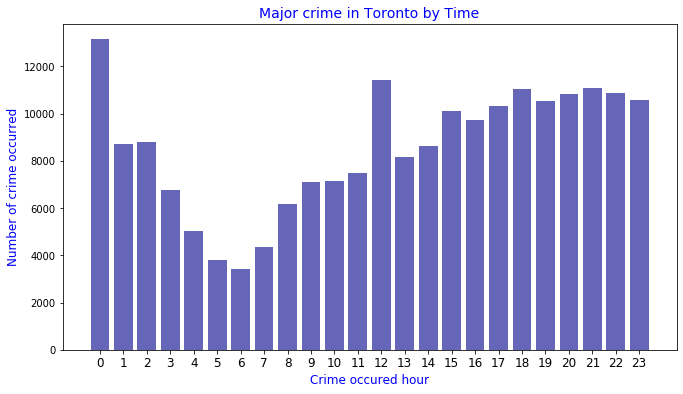

In [41]:
x_axis = crime_data_Grp_hr["occurrencehour"]
y_value= crime_data_Grp_hr['Count']

plt.figure(figsize=(11,6))
plt.bar(x_axis,y_value, color ='darkblue',alpha=0.6)

plt.title("Major crime in Toronto by Time",fontsize =14, color ='blue')
plt.xlabel('Crime occured hour',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.xticks(x_axis,rotation=0,fontsize =12)

plt.savefig("Data Output/major_crime_day.png")
plt.show()

In [31]:
#crime_data_clean.head()

In [30]:
#crime_data_assult.head()

In [32]:
# get the average number of crime by hour (time) from 2014 to 2019
crime_data_assult_hr = crime_data_assult.groupby('occurrencehour').count()/6
crime_data_assult_hr = crime_data_assult_hr.reset_index()

crime_data_BnE_hr = crime_data_BnE.groupby('occurrencehour').count()/6
crime_data_BnE_hr = crime_data_BnE_hr.reset_index()

crime_data_auto_hr = crime_data_auto.groupby('occurrencehour').count()/6
crime_data_auto_hr = crime_data_auto_hr.reset_index()

crime_data_robb_hr = crime_data_robb.groupby('occurrencehour').count()/6
crime_data_robb_hr = crime_data_robb_hr.reset_index()

In [34]:
crime_data_assult_hr

,occurrencehour,Unnamed: 0,event_unique_id,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,Count
0,0.0,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,...,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333,1142.333333
1,1.0,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,...,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667,820.166667
2,2.0,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,...,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000,886.500000
3,3.0,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,...,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667,565.666667
4,4.0,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
5,5.0,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,...,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000,248.500000
6,6.0,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,...,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667,247.166667
7,7.0,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,...,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333,337.833333
8,8.0,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,...,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000,520.500000
9,9.0,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,...,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667,625.166667


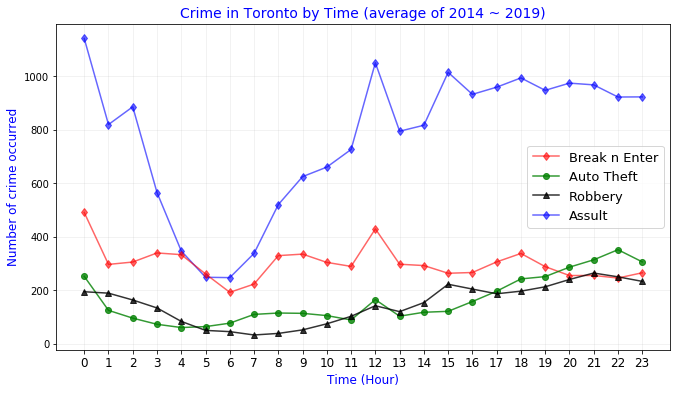

In [39]:
plt.figure(figsize=(11,6))

x_axis = crime_data_assult_hr['occurrencehour']

y_value= crime_data_assult_hr['Count']
assult_hr, = plt.plot(x_axis,y_value,color ='blue',alpha=0.6, marker="d",label="Assult")

y_value= crime_data_BnE_hr['Count']
BnE, =plt.plot(x_axis,y_value,color ='red',alpha=0.6, marker="d",label="Break n Enter")

y_value= crime_data_auto_hr['Count']
auto, =plt.plot(x_axis,y_value,color ='green',alpha=0.8, marker="o",label="Auto Theft")

y_value= crime_data_robb_hr['Count']
robb, =plt.plot(x_axis,y_value,color ='black',alpha=0.8, marker="^",label="Robbery")

plt.title("Crime in Toronto by Time (average of 2014 ~ 2019)",fontsize =14, color ='blue')
plt.xlabel('Time (Hour)',fontsize =12,color ='blue')
plt.ylabel('Number of crime occurred',fontsize =12,color ='blue')
plt.grid(alpha=0.2)
plt.xticks(x_axis,rotation=0,fontsize =12)
#plt.ylim(2000, 9000)
plt.legend(handles=[BnE,auto, robb, assult], loc="best",fontsize =13 )

plt.savefig("Data Output/Others_crime_hr.png")
plt.show()